In [1]:
%matplotlib inline

In [2]:
import os.path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
golden_ratio = 0.5 * (1 + np.sqrt(5))
golden_size = lambda width: (width, width / golden_ratio)

In [4]:
n_splits = 3
name = "default"
summary_dir = "../logs"

In [5]:
names = ["default", "adam", "adam-beta-0.5"]
splits = range(n_splits)

In [6]:
def get_basename(name, split_num):

    return f"{name}.split{split_num:d}"

In [7]:
def make_plot_data(names, splits):

    df_list = []

    for name in names:
        for split_num in splits:

            basename = get_basename(name, split_num)
            csv_path = os.path.join(summary_dir, f"{basename}.csv")

            df = pd.read_csv(csv_path).assign(name=name, split=split_num)
            df_list.append(df)

    data = pd.concat(df_list, axis="index", sort=True)

    return data

In [8]:
data = make_plot_data(names, splits).rename(columns=dict(acc="train", val_acc="validation"))
data

,acc,epoch,loss,name,split,val_acc,val_loss
0,0.549547,0,0.686236,default,0,0.594047,0.664571
1,0.684805,1,0.552702,default,0,0.761138,0.424759
2,0.779081,2,0.391026,default,0,0.785665,0.378143
3,0.793507,3,0.366172,default,0,0.796531,0.362314
4,0.800120,4,0.356319,default,0,0.800752,0.356151
...,...,...,...,...,...,...,...
45,0.943951,45,0.154312,adam-beta-0.5,2,0.936043,0.170211
46,0.944232,46,0.154091,adam-beta-0.5,2,0.942613,0.159338
47,0.944287,47,0.153982,adam-beta-0.5,2,0.947752,0.147644
48,0.944653,48,0.153808,adam-beta-0.5,2,0.948292,0.146144


In [9]:
data = data.rename(columns=dict(acc="train", val_acc="validation"))
data

,train,epoch,loss,name,split,validation,val_loss
0,0.549547,0,0.686236,default,0,0.594047,0.664571
1,0.684805,1,0.552702,default,0,0.761138,0.424759
2,0.779081,2,0.391026,default,0,0.785665,0.378143
3,0.793507,3,0.366172,default,0,0.796531,0.362314
4,0.800120,4,0.356319,default,0,0.800752,0.356151
...,...,...,...,...,...,...,...
45,0.943951,45,0.154312,adam-beta-0.5,2,0.936043,0.170211
46,0.944232,46,0.154091,adam-beta-0.5,2,0.942613,0.159338
47,0.944287,47,0.153982,adam-beta-0.5,2,0.947752,0.147644
48,0.944653,48,0.153808,adam-beta-0.5,2,0.948292,0.146144


In [19]:
data = data.assign(name=data.name.replace({"default": "rmsprop"}))

In [20]:
new_data = pd.melt(data, id_vars=["name", "split", "epoch"], value_vars=["train", "validation"], 
                   value_name="accuracy", var_name="partition")
new_data

,name,split,epoch,partition,accuracy
0,rmsprop,0,0,train,0.549547
1,rmsprop,0,1,train,0.684805
2,rmsprop,0,2,train,0.779081
3,rmsprop,0,3,train,0.793507
4,rmsprop,0,4,train,0.800120
...,...,...,...,...,...
895,adam-beta-0.5,2,45,validation,0.936043
896,adam-beta-0.5,2,46,validation,0.942613
897,adam-beta-0.5,2,47,validation,0.947752
898,adam-beta-0.5,2,48,validation,0.948292


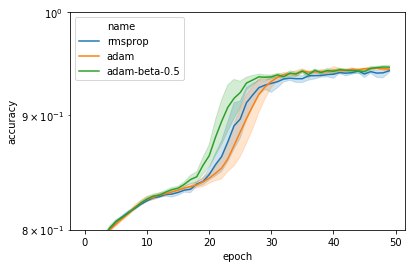

In [21]:
fig, ax = plt.subplots()

g = sns.lineplot(x="epoch", y="accuracy", 
                 hue="name", # style="partition", 
#                  units="split", estimator=None,
                 data=new_data, ax=ax)

ax.set_yscale('log')
ax.set_ylim(0.8, 1.0)
plt.show()

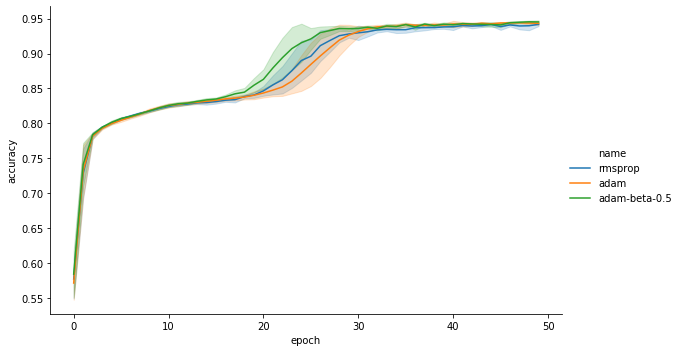

In [29]:
g = sns.relplot(x="epoch", y="accuracy", hue="name",
#                  units="split", estimator=None,
                ci="sd", # col="partition",
                height=5, aspect=golden_ratio,
                data=new_data, kind="line")
                # facet_kws=dict(margin_titles=True))
# g.set_titles(template='')
#        # .set_titles(row_template=r"amplitude $\sigma={{{row_name:.2f}}}$",
#        #             col_template=r"lengthscale $\ell={{{col_name:.3f}}}$")
# g.despine(top=True, right=True, left=True, bottom=True, trim=False)
# g.set(xticks=[], yticks=[])
# g.set_axis_labels("", "")
# g.fig.subplots_adjust(wspace=.01, hspace=.01)

In [33]:
names = ["default", "adam", "adam-beta-0.5"]
pretty_names = ["RMSProp", r"Adam ($\beta=0.9$)", r"Adam ($\beta=0.5$)"]
pretty_name_mapping = dict(zip(names, pretty_names))
pretty_name_mapping

{'default': 'RMSProp',
 'adam': 'Adam ($\\beta=0.9$)',
 'adam-beta-0.5': 'Adam ($\\beta=0.5$)'}

In [35]:
new_data.query("partition == 'validation'")

,name,split,epoch,partition,accuracy
450,rmsprop,0,0,validation,0.594047
451,rmsprop,0,1,validation,0.761138
452,rmsprop,0,2,validation,0.785665
453,rmsprop,0,3,validation,0.796531
454,rmsprop,0,4,validation,0.800752
...,...,...,...,...,...
895,adam-beta-0.5,2,45,validation,0.936043
896,adam-beta-0.5,2,46,validation,0.942613
897,adam-beta-0.5,2,47,validation,0.947752
898,adam-beta-0.5,2,48,validation,0.948292
